In [1]:
# Interactive World Map

In [3]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():
    df = pd.read_csv('merged_data_combined_iso3.csv')
    pn.state.cache['data'] = df.copy()
else: 
    df = pn.state.cache['data']

df = df.rename(columns= {"ISO3" : "iso_a3"})
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual,ISO_Code,Region_Code,Life_Expectancy,Total_Population,iso_a3
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363,FI,WE,82.5148,5559408.0,FIN
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084,DK,WE,82.0326,5928585.0,DNK
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250,IS,WE,82.9578,384303.0,ISL
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691,IL,MENAF,83.3861,9693280.0,ISR
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110,NL,WE,82.5802,17750264.0,NLD


In [4]:
df_grouped = df.groupby('Country')['Happiness'].mean().reset_index()  

In [5]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
iso_a3_set_df = set(df['iso_a3'])
iso_a3_set_world = set(world['iso_a3'])

In [7]:
missing_in_df = iso_a3_set_world - iso_a3_set_df

if missing_in_df:
    print("ISO_A3-Codes, die in df fehlen (keine Happiness-Werte):", missing_in_df)
else:
    print("Alle ISO_A3-Codes in df sind auch in world vorhanden.")

ISO_A3-Codes, die in df fehlen (keine Happiness-Werte): {'CUB', 'VUT', 'GRL', 'GUY', 'GNQ', 'ERI', 'SLB', 'NCL', 'ESH', 'BRN', 'GNB', 'NAM', 'FLK', 'BHS', 'PNG', 'TLS', 'ATF', '-99', 'PRK', 'ATA', 'FJI'}


In [8]:
missing_in_world = iso_a3_set_df - iso_a3_set_world

if missing_in_world:
    print("ISO_A3-Codes, die in world fehlen (keine Geodaten):", missing_in_world)
else:
    print("Alle ISO_A3-Codes in df2 sind auch in df1 vorhanden.")

ISO_A3-Codes, die in world fehlen (keine Geodaten): {'SGP', 'MUS', 'BHR', 'XKX', 'COM', 'MLT', 'NOR', 'MDV', 'FRA', nan, 'HKG'}


In [9]:
# Die bereitgestellten GeoJSON-Daten für Bahrain
bahrain_geojson = {
    "type": "Feature",
    "properties": {"Country": "Bahrain", "iso_a3": "BHR", "woeid": "23424753"},
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [50.441498315672, 26.079486759594],
                [50.444990826448, 26.155368387131],
                [50.494398435257, 26.240297244012],
                [50.565645056344, 26.252673936522],
                [50.58600454793, 26.247660903832],
                [50.628002395199, 25.943018578555],
                [50.610418895937, 25.857704991003],
                [50.5840692813, 25.815491188858],
                [50.508839915777, 25.868375997347],
                [50.459210656002, 25.954651764437],
                [50.441498315672, 26.079486759594]
            ]
        ]
    }
}

# Erstellen Sie ein GeoDataFrame für Bahrain
bahrain_gdf = gpd.GeoDataFrame([{
    "name": "Bahrain",
    "geometry": shape(bahrain_geojson['geometry']),
    "iso_a3": bahrain_geojson['properties']['iso_a3']
}])

# Fügen Sie Bahrain zu Ihrem vorhandenen GeoDataFrame hinzu
world = gpd.GeoDataFrame(pd.concat([world, bahrain_gdf], ignore_index=True))

In [10]:
bih_geojson = {
    "type": "Feature",
    "properties": {
        "Country": "Bosnia and Herzegovina",
        "iso_a3": "BIH",
        "code": "BIH",
        "group": "Countries"
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [ [ 19.005486, 44.860234 ], [ 19.36803, 44.863 ], [ 19.11761, 44.42307 ], [ 19.59976, 44.03847 ],
            [ 19.454, 43.5681 ], [ 19.21852, 43.52384 ], [ 19.03165, 43.43253 ], [ 18.70648, 43.20011 ],
            [ 18.56, 42.65 ], [ 17.674922, 43.028563 ], [ 17.297373, 43.446341 ], [ 16.916156, 43.667722 ],
            [ 16.456443, 44.04124 ], [ 16.23966, 44.351143 ], [ 15.750026, 44.818712 ], [ 15.959367, 45.233777 ],
            [ 16.318157, 45.004127 ], [ 16.534939, 45.211608 ], [ 17.002146, 45.233777 ], [ 17.861783, 45.06774 ],
            [ 18.553214, 45.08159 ], [ 19.005486, 44.860234 ] ]
        ]
    },
    "_id": "bosnia and herzegovina"
}

bih_gdf = gpd.GeoDataFrame([{
    "name": "Bosnia and Herzegovina",
    "geometry": shape(bih_geojson['geometry']),
    "iso_a3": bih_geojson['properties']['iso_a3']
}])

world = gpd.GeoDataFrame(pd.concat([world, bih_gdf], ignore_index=True))


In [11]:
missing_in_world = iso_a3_set_df - iso_a3_set_world

if missing_in_world:
    print("ISO_A3-Codes, die in world fehlen (keine Geodaten):", missing_in_world)
else:
    print("Alle ISO_A3-Codes in df2 sind auch in df1 vorhanden.")

ISO_A3-Codes, die in world fehlen (keine Geodaten): {'SGP', 'MUS', 'BHR', 'XKX', 'COM', 'MLT', 'NOR', 'MDV', 'FRA', nan, 'HKG'}


In [12]:
world=pd.merge(world,df,left_on=['iso_a3'],right_on=['iso_a3'],how='left')

C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


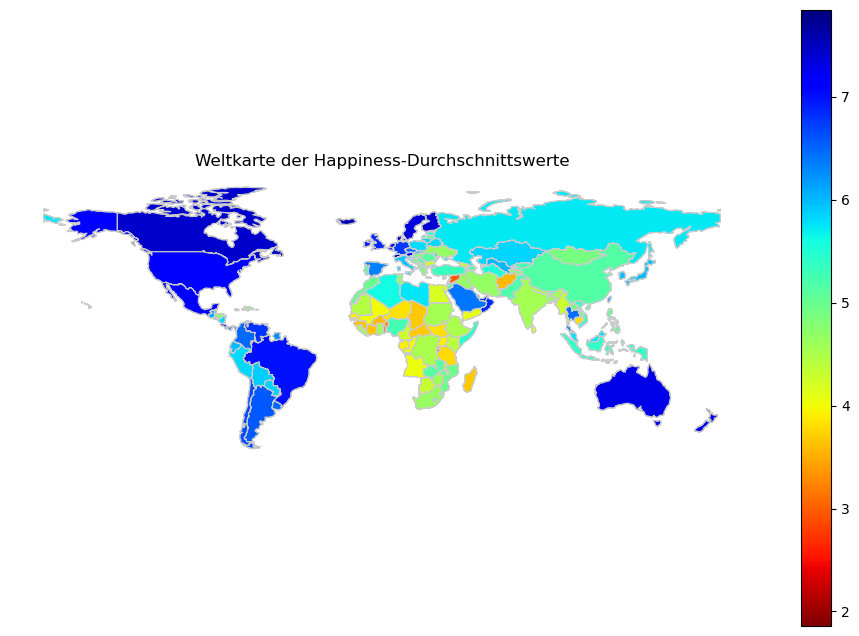

In [13]:
# Definieren Sie Ihre Farbskala (colormap)
cmap = 'jet_r'  # Sie können eine andere Colormap wählen

# Erstellen Sie eine Figure und eine Axis für die Karte
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
world.plot(column='Happiness', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Legende hinzufügen
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=world['Happiness'].min(), vmax=world['Happiness'].max()))
sm._A = []

cbar = plt.colorbar(sm, ax=ax)
# Titel und Achsenbeschriftungen hinzufügen
plt.title("Weltkarte der Happiness-Durchschnittswerte")
ax.set_axis_off()

# Anzeigen der Weltkarte
plt.show()

In [14]:
world_shapes = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_shapes = world_shapes.set_geometry('geometry')
world_shapes.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    
    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()
    
    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr
        filtered_data = self.world_data[self.world_data["Year"] == self.year]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'jet_r'
        merged.plot(column="Happiness", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged["Happiness"].min(), vmax=merged["Happiness"].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der Happiness-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()
        
        return pn.pane.Matplotlib(fig, width=800, height=500)

In [16]:
# Erstellen Sie die WorldMapApp-Instanz
world_map_app = WorldMapApp(world=world)



In [17]:
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = event.new
    world_map_app.year = year

year_slider.param.watch(update_world_map, 'value')


Watcher(inst=IntSlider(end=2023, name='Year', start=2015, value=2015), cls=<class 'panel.widgets.slider.IntSlider'>, fn=<function update_world_map at 0x0000024C8018C5E0>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Traceback (most recent call last):
 File "C:\Users\User\anaconda3\Lib\site-packages\pyviz_comms\__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\viewable.py", line 298, in _on_msg
 doc.unhold()
 File "C:\Users\User\anaconda3\Lib\site-packages\bokeh\document\document.py", line 799, in unhold
 self.callbacks.unhold()
 File "C:\Users\User\anaconda3\Lib\site-packages\bokeh\document\callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "C:\Users\User\anaconda3\Lib\site-packages\bokeh\document\callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "C:\Users\User\anaconda3\Lib\site-packages\bokeh\document\callbacks.py", line 408, in invoke_with_curdoc
 return f()
 ^^^
 File "C:\Users\User\anaconda3\Lib\site-packages\bokeh\util\callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\reactive.py", line 403, in _comm_change
 state._handle_exception(e)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\io\state.py", line 408, in _handle_exception
 raise exception
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\reactive.py", line 401, in _comm_change
 self._schedule_change(doc, comm)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\reactive.py", line 383, in _schedule_change
 self._change_event(doc)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\reactive.py", line 379, in _change_event
 self._process_events(events)
 File "C:\Users\User\anaconda3\Lib\site-packages\panel\reactive.py", line 318, in _process_events
 self.param.update(**self_events)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 1902, in update
 self_._batch_call_watchers()
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 2063, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 2025, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\User\AppData\Local\Temp\ipykernel_19436\1986497941.py", line 6, in update_world_map
 world_map_app.year = year
 ^^^^^^^^^^^^^^^^^^
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 367, in _f
 instance_param.__set__(obj, val)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 369, in _f
 return f(self, obj, val)
 ^^^^^^^^^^^^^^^^^
 File "C:\Users\User\anaconda3\Lib\site-packages\param\__init__.py", line 625, in __set__
 super(Dynamic,self).__set__(obj,val)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 369, in _f
 return f(self, obj, val)
 ^^^^^^^^^^^^^^^^^
 File "C:\Users\User\anaconda3\Lib\site-packages\param\parameterized.py", line 1201, in __set__
 self._validate(val)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\__init__.py", line 947, in _validate
 self._validate_bounds(val, self.bounds, self.inclusive_bounds)
 File "C:\Users\User\anaconda3\Lib\site-packages\param\__init__.py", line 910, in _validate_bounds
 raise ValueError("Parameter %r must be at most %s, "
ValueError: Parameter 'year' must be at most 2020, not 2021.

Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] ParamMethod(method, _pane=Matplotlib)
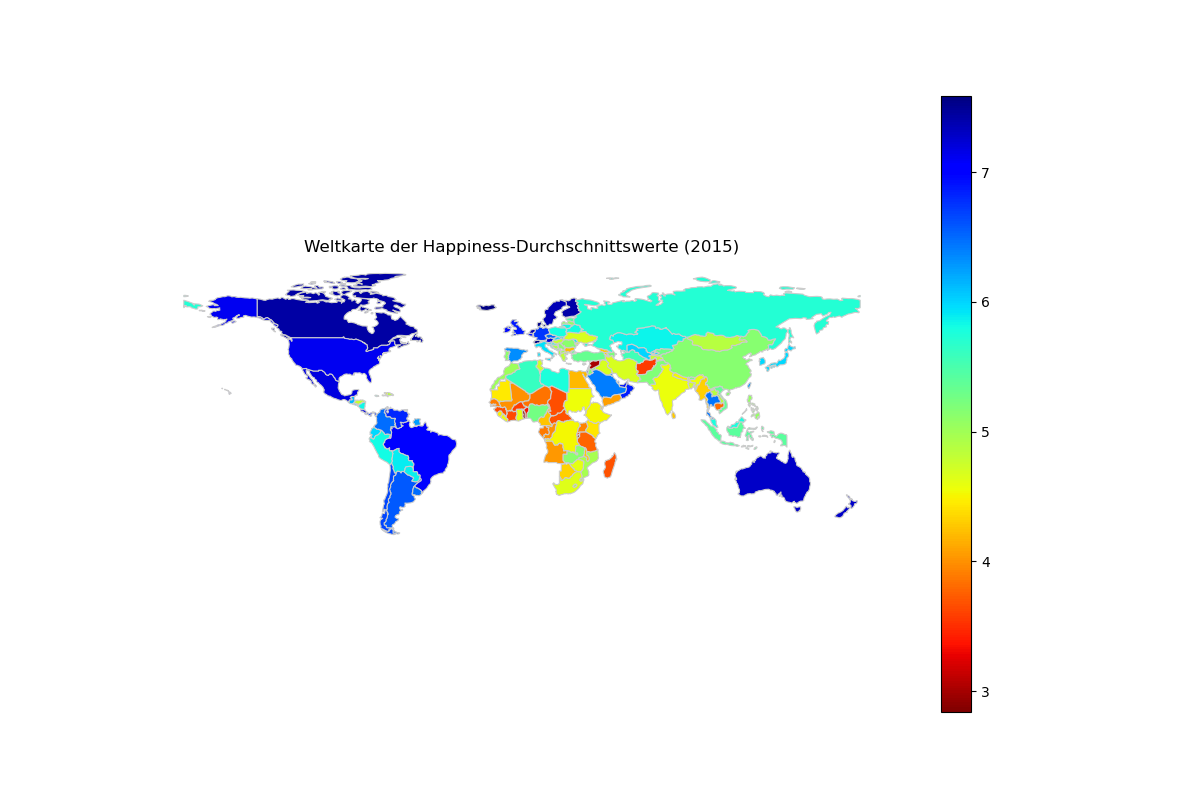

In [18]:
# Verknüpfen Sie den Slider mit der year-Parameter der WorldMapApp
year_slider.param.value = world_map_app.param.year

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()

In [19]:
class WorldMapApp(param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    variable = param.ObjectSelector(default="Happiness", objects=["Happiness", "Explained_by_Happiness", "Explained_by_GDP"])

    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()

    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr und der ausgewählten Variable
        filtered_data = self.world_data[(self.world_data["Year"] == self.year)]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'jet_r'
        merged.plot(column=self.variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

        # Legende hinzufügen
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged[self.variable].min(), vmax=merged[self.variable].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax)

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der {self.variable}-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()

        return pn.pane.Matplotlib(fig, width=800, height=500)


In [20]:
world_map_app = WorldMapApp(world=world)
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)
variable_selector = pn.widgets.Select(name='Variable', options=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"], value="Happiness")

In [21]:
# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = year_slider.value
    world_map_app.year = year

def update_variable(event):
    variable = variable_selector.value
    world_map_app.variable = variable




In [22]:
year_slider.param.watch(update_world_map, 'value')
variable_selector.param.watch(update_variable, 'value')





Watcher(inst=Select(name='Variable', options=['Happiness', ...], value='Happiness'), cls=<class 'panel.widgets.select.Select'>, fn=<function update_variable at 0x0000024C80CCDC60>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
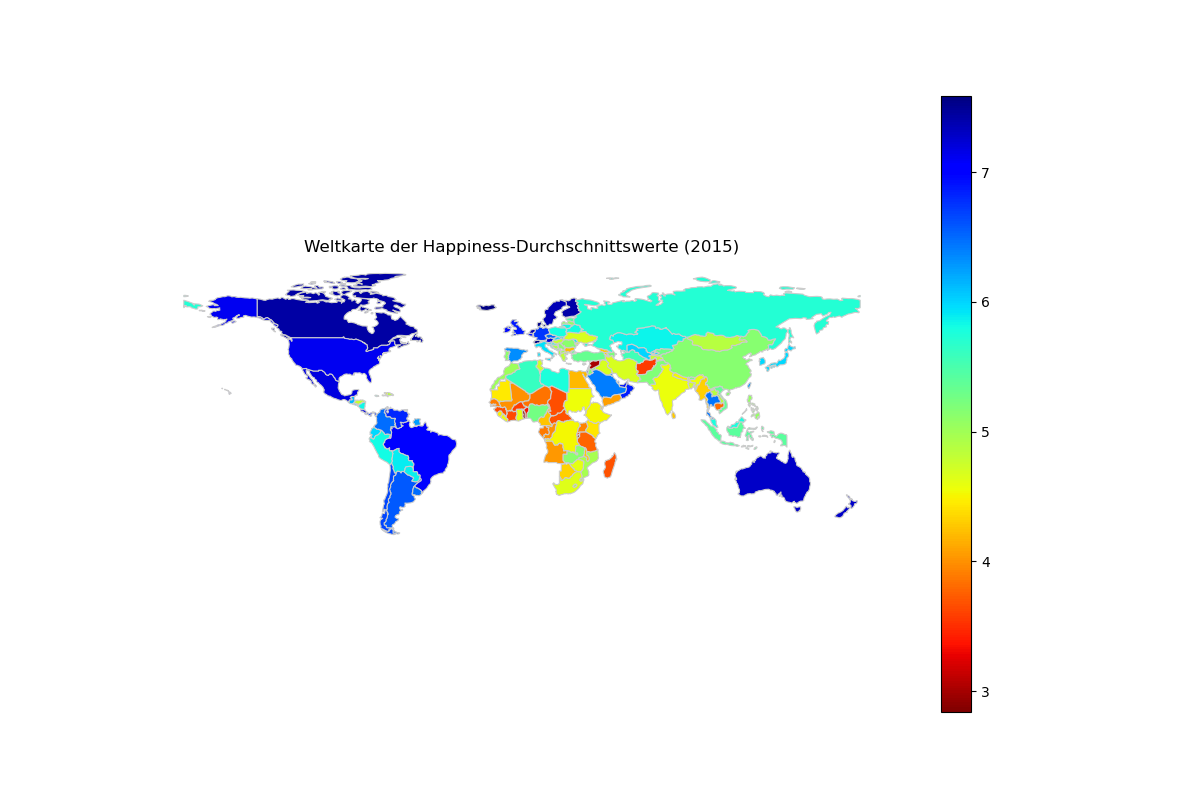

In [23]:
# Verknüpfen Sie den Slider und das Dropdown-Widget mit den entsprechenden Parametern der WorldMapApp
year_slider.param.value = world_map_app.param.year
variable_selector.param.value = world_map_app.param.variable

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()




In [24]:

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)



C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
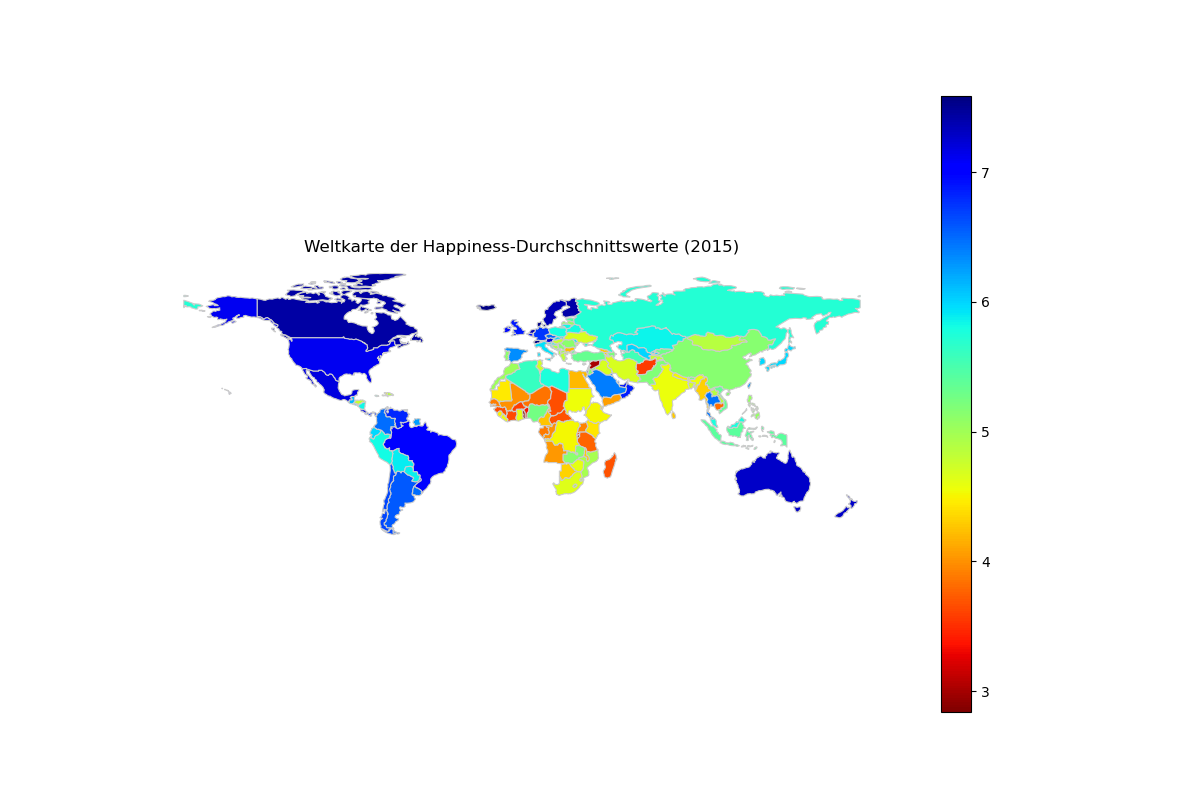

In [25]:
# Zeigen Sie die App an
world_map_pane.servable()

C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\User\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Column
    [0] IntSlider(end=2023, name='Year', start=2015, value=2015)
    [1] Select(name='Variable', options=['Happiness', ...], value='Happiness')
    [2] ParamMethod(method, _pane=Matplotlib)
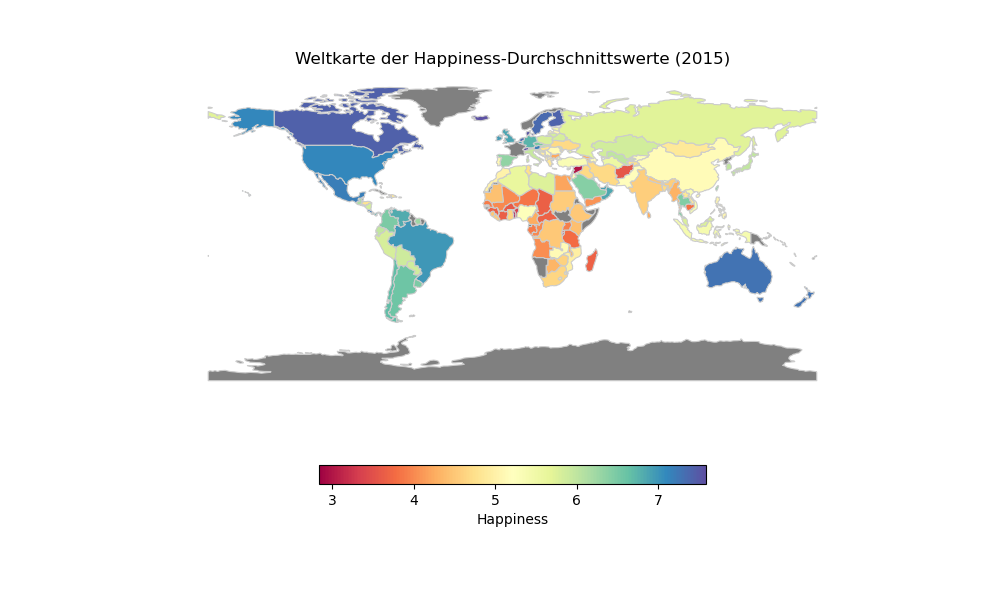

In [43]:
class WorldMapApp (param.Parameterized):
    year = param.Integer(default=2015, bounds=(2015, 2020))
    variable = param.ObjectSelector(default="Happiness", objects=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"])

    def __init__(self, world, **params):
        super().__init__(**params)
        self.world_data = df.copy()

    def view(self):
        # Filtern Sie die Daten basierend auf dem ausgewählten Jahr und der ausgewählten Variable
        filtered_data = self.world_data[(self.world_data["Year"] == self.year)]
        merged = world_shapes.set_index('iso_a3').join(filtered_data.set_index('iso_a3'), lsuffix='_world_shapes', rsuffix='_filtered_data')

        # Erstellen Sie die Figure und die Achse für die Karte
        fig, ax = plt.subplots(1, 1, figsize=(10,6))

        # Plotten Sie die Weltkarte und färben Sie die Länder basierend auf den Durchschnittswerten
        cmap = 'Spectral'
        missing_color = 'grey'
        im = merged.plot(column=self.variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', missing_kwds={'color': missing_color})

        # Legende hinzufügen und aktualisieren
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged[self.variable].min(), vmax=merged[self.variable].max()))
        sm._A = []
        cbar = plt.colorbar(sm, ax=ax,location='bottom', shrink=0.5)
        cbar.set_label(self.variable)  # Setzen Sie den Labeltext der Legende

        # Titel und Achsenbeschriftungen hinzufügen
        plt.title(f"Weltkarte der {self.variable}-Durchschnittswerte ({self.year})")
        ax.set_axis_off()

        # Anzeigen der Weltkarte
        plt.close()

        return pn.pane.Matplotlib(fig, width=800, height=500)

world_map_app = WorldMapApp(world=world)
year_slider = pn.widgets.IntSlider(name='Year', start=2015, end=2023, step=1, value=2015)
variable_selector = pn.widgets.Select(name='Variable', options=["Happiness", "Explained_by_Trust" ,"Explained_by_GDP" , "Explained_by_Freedom" ,"Explained_by_Generosity" ," Explained_by_Health", "Explained_by_Social_support", "Dystopia_Residual", "Life_Expectancy", "Total_Population"], value="Happiness")

# Erstellen Sie eine Funktion, um die Karte zu aktualisieren
def update_world_map(event):
    year = year_slider.value
    world_map_app.year = year

def update_variable(event):
    variable = variable_selector.value
    world_map_app.variable = variable

year_slider.param.watch(update_world_map, 'value')
variable_selector.param.watch(update_variable, 'value')

# Verknüpfen Sie den Slider und das Dropdown-Widget mit den entsprechenden Parametern der WorldMapApp
year_slider.param.value = world_map_app.param.year
variable_selector.param.value = world_map_app.param.variable

# Erstellen Sie ein Panel-Element für die Karte
world_map_pane = pn.Column(
    year_slider,
    variable_selector,
    world_map_app.view
)

# Zeigen Sie die App an
world_map_pane.servable()

In [44]:
import geoviews

C:\Users\User\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\User\anaconda3\Lib\site-packages\geoviews\operation\__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


In [48]:
happiness = df.loc[:,'Happiness']
happiness

0       7.804
1       7.586
2       7.530
3       7.473
4       7.403
        ...  
1381    3.465
1382    3.340
1383    3.006
1384    2.905
1385    2.839
Name: Happiness, Length: 1386, dtype: float64

In [50]:
class MapViewer(param.Parameterized):

    plotting = param.Selector(
        default='All', objects='All')
    local_authority_name = param.Selector(
        default='All', objects=['All'] +
        [geography[geography[locationcol] == lad][namecol].iat[0]
         for lad in local_authorities])

    @param.depends('granularity', 'local_authority_name')
    def view(self):

        if self.granularity == 'Local Authorities':
            gdf = london_lads_data_gdf
            max_value = lad_max_value
            title = datacol + " by Local Authority"
        else:
            max_value = ward_max_value
            if self.local_authority_name == 'All':
                gdf = london_wards_data_gdf
                title = datacol + " by Ward"
            else:
                local_authority_id = geography[geography['Name'] ==
                                               self.local_authority_name].iloc[0]['GeographyCode']
                gdf = london_wards_data_gdf[london_wards_data_gdf['lad11cd'].str.match(
                    local_authority_id)]
                title = datacol + " by Ward for " + self.local_authority_name

        map = gv.Polygons(
            gdf, vdims=[locationcol, namecol, datacol, 'LAD11NM'])
        map.opts(title=title,
                 width=900, height=600,
                 toolbar=None,
                 tools=['hover'],
                 aspect='equal',
                 color=gv.dim(datacol),
                 colorbar=True,
                 cmap='Viridis',
                 clim=(0, max_value),
                 colorbar_opts={'formatter': PrintfTickFormatter(format='%f')},
                 line_color='black', line_width=0.25, fill_alpha=1,
                 xaxis=None,
                 yaxis=None)

        return map


viewer = MapViewer(name='Map Viewer')
widgets = pn.Param(viewer.param, name='Census Data', widgets={
    'granularity': pn.widgets.RadioButtonGroup,
    'local_authority_name': pn.widgets.Select
})
pn.Column(widgets, viewer.view).show()

NameError: name 'local_authorities' is not defined

In [27]:
world_map

NameError: name 'world_map' is not defined